# House Price Tehran Iran

<b>Context</b>
<br/>
I was trying to find a house for myself and I decide to collect many houses detail on an Iranian website with their updated price and this is the final data which is a kind of house pricing prediction.
<br/>
<br/>
<b>Content</b> <br/>
There is some information about each house:
<ul>
    <li>Area in square meters</li>
    <li>Number of bedrooms</li>
    <li>Has Parking or not</li>
    <li>Has elevator or not</li>
    <li>Has warehouse or not</li>
    <li>The region where the house is placed</li>
    <li>Price in Toman and USD</li>
</ul>
<b>Notes</b>
<br/>
<ul>
    <li>Every USD is equal to 30,000 Tomans (Extra Info).</li>
    <li>Take care about outliers.</li>
</ul>
<i>*Purpose of this project is for my learning only, credit from:*</i>
<a href="https://www.kaggle.com/mokar2001/house-price-tehran-iran">Kaggle</a>

<h3>1. Data Cleaning </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv("house_price_tehran_iran.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.shape

(3479, 8)

In [4]:
len(df.Address.unique())

193

In [5]:
df2 = df.drop(['Address','Price'], axis='columns')
df2.head()

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
0,63,1,True,True,True,61666.67
1,60,1,True,True,True,61666.67
2,79,2,True,True,True,18333.33
3,95,2,True,True,True,30083.33
4,123,2,True,True,True,233333.33


I don't think the Address and Price fields are useful so i removed it because: <br/>
1. An address is the same as a name so it's not needed in ML or ANN <br/>
2. *Every USD is equal to 30,000 Tomans (Extra Info).*, so i removed the price column because already represented

In [6]:
df2.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Price(USD)    0
dtype: int64

<AxesSubplot:xlabel='Room', ylabel='Price(USD)'>

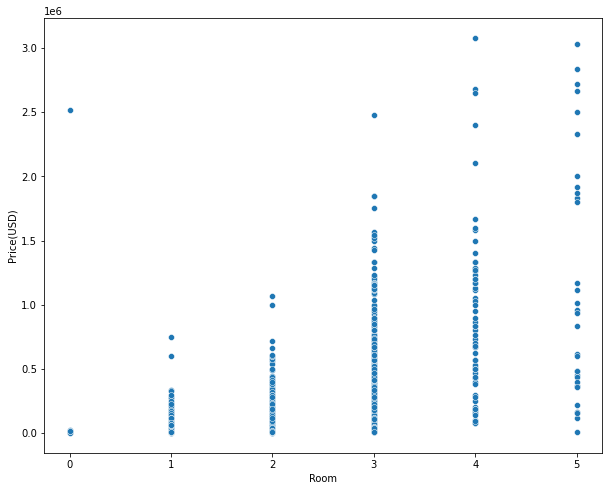

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Room', y='Price(USD)', data=df2)

In [8]:
df2.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Price(USD)    float64
dtype: object

In [9]:
df2.Area.values

array(['63', '60', '79', ..., '75', '105', '82'], dtype=object)

In [10]:
df2.shape

(3479, 6)

In [11]:
df2[pd.to_numeric(df2.Area, errors='coerce').isnull()]

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
570,"3,310,000,000",2,True,True,True,110333.33
709,"16,160,000,000",3,True,True,True,538666.67
807,"1,000",2,True,True,False,233333.33
1604,"8,400,000,000",2,True,True,True,290000.00
2171,"3,600",2,False,False,False,324000.00
2802,"2,550,000,000",2,True,True,True,85000.00


In [12]:
df2[pd.to_numeric(df2.Area, errors='coerce').isnull()].index

Int64Index([570, 709, 807, 1604, 2171, 2802], dtype='int64')

In [13]:
df3 = df2.drop(df2[pd.to_numeric(df2.Area, errors='coerce').isnull()].index, axis=0)
df3.shape

(3473, 6)

If you noticed that area column is a object so, i must change to int or float. And before i changes the column i there a some outliers that i have to remove it.

In [14]:
df3.Area = pd.to_numeric(df3.Area)
df3.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Price(USD)    float64
dtype: object

In [15]:
df3.describe()

,Area,Room,Price(USD)
count,3473.000000,3473.000000,3.473000e+03
mean,106.774547,2.079758,1.784874e+05
std,69.365567,0.758764,2.701353e+05
min,30.000000,0.000000,1.200000e+02
25%,69.000000,2.000000,4.716667e+04
50%,90.000000,2.000000,9.600000e+04
75%,120.000000,2.000000,2.000000e+05
max,929.000000,5.000000,3.080000e+06


In [16]:
df3.sample(10)

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
1126,105,2,True,True,True,29166.67
2524,100,2,True,False,True,30000.00
1634,49,1,True,True,True,89800.00
1446,90,2,True,True,True,233333.33
2897,68,2,True,True,True,97666.67
495,105,2,True,True,True,23000.00
2650,51,1,True,True,False,22333.33
425,120,2,True,True,True,296666.67
1678,83,2,True,True,True,76666.67
2369,95,2,True,True,True,326666.67


In [17]:
for column in df3:
    if df3[column].dtypes=='bool':
        print(f'{column} : {df3[column].unique()}')

Parking : [ True False]
Warehouse : [ True False]
Elevator : [ True False]


In [18]:
df3.replace(True, int(1), inplace=True)
df3.replace(False, int(0), inplace=True)
df3.head()

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
0,63,1,1.0,1.0,1.0,61666.67
1,60,1,1.0,1.0,1.0,61666.67
2,79,2,1.0,1.0,1.0,18333.33
3,95,2,1.0,1.0,1.0,30083.33
4,123,2,1.0,1.0,1.0,233333.33


<h3>2. Feature Scaling</h3>

<AxesSubplot:xlabel='Price(USD)', ylabel='Density'>

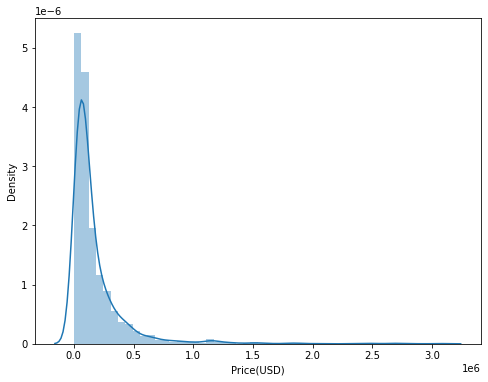

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(df3['Price(USD)'])

In [20]:
df3['log10_Price(USD)'] = df3['Price(USD)'].apply(np.log10)
df3.head()

,Area,Room,Parking,Warehouse,Elevator,Price(USD),log10_Price(USD)
0,63,1,1.0,1.0,1.0,61666.67,4.790050
1,60,1,1.0,1.0,1.0,61666.67,4.790050
2,79,2,1.0,1.0,1.0,18333.33,4.263241
3,95,2,1.0,1.0,1.0,30083.33,4.478326
4,123,2,1.0,1.0,1.0,233333.33,5.367977


<AxesSubplot:xlabel='log10_Price(USD)', ylabel='Density'>

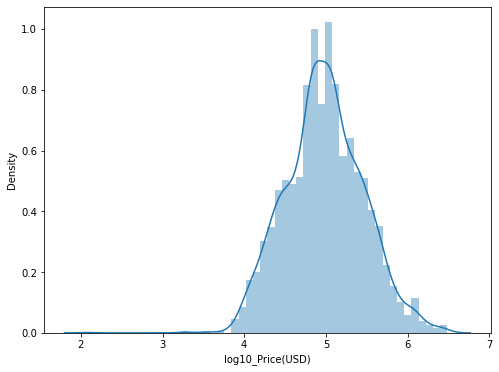

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(df3['log10_Price(USD)'])

<AxesSubplot:xlabel='Room', ylabel='log10_Price(USD)'>

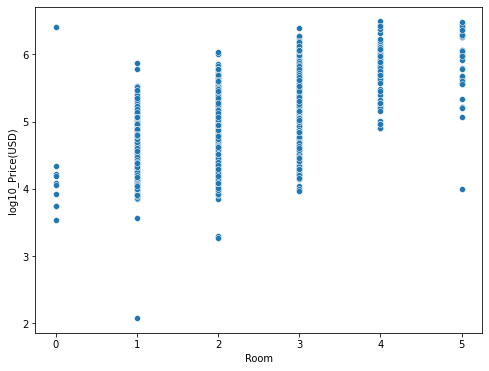

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Room', y='log10_Price(USD)', data=df3)

In [23]:
len(df3[df3['Room']==0])

10

In [24]:
df4 = df3.drop(df3[df3['Room']==0].index,axis=0)
df4.shape

(3463, 7)

<AxesSubplot:xlabel='Room', ylabel='log10_Price(USD)'>

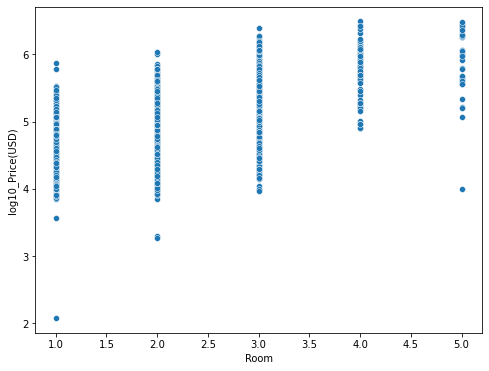

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Room', y='log10_Price(USD)', data=df4)

<h3>3. Removing and Detecting Outliers</h3>
<br/>
I make a new column that contains square foot that is area devide by rooms. And i added warehouse and parking because i think that includes rooms too.

In [26]:
df4['sqft'] = df4['Area'] / (df4['Room']+df4['Parking']+df4['Warehouse'])
df4.head()

,Area,Room,Parking,Warehouse,Elevator,Price(USD),log10_Price(USD),sqft
0,63,1,1.0,1.0,1.0,61666.67,4.790050,21.00
1,60,1,1.0,1.0,1.0,61666.67,4.790050,20.00
2,79,2,1.0,1.0,1.0,18333.33,4.263241,19.75
3,95,2,1.0,1.0,1.0,30083.33,4.478326,23.75
4,123,2,1.0,1.0,1.0,233333.33,5.367977,30.75


In [27]:
df4['sqft'].describe()

count    3463.000000
mean       27.657421
std        14.673211
min        10.833333
25%        20.500000
50%        24.600000
75%        30.000000
max       300.000000
Name: sqft, dtype: float64

In [28]:
IQR = np.percentile(df4['sqft'], 75) - np.percentile(df4['sqft'], 25)
lower_limit = np.percentile(df4['sqft'], 25) - (1.5 * IQR)
upper_limit = np.percentile(df4['sqft'], 75) + (1.5 * IQR)
print(lower_limit)
print(upper_limit)

6.25
44.25


In this case i used IQR for detect outliers.

In [29]:
len(df4[df4['sqft']<lower_limit])

0

In [30]:
len(df4[df4['sqft']>upper_limit])

235

In [31]:
df4.shape

(3463, 8)

In [32]:
df5 = df4.drop(df4[df4['sqft']>upper_limit].index, axis=0)
df5.shape

(3228, 8)

<h3>4. Modeling </h3>

In [33]:
df5.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Price(USD),log10_Price(USD),sqft
550,70,2,1.0,1.0,1.0,93333.33,4.970037,17.500000
1016,57,1,1.0,1.0,1.0,53333.33,4.726999,19.000000
1020,50,1,1.0,1.0,1.0,66000.00,4.819544,16.666667
1804,85,2,1.0,0.0,1.0,15666.67,4.194977,28.333333
2849,47,1,0.0,1.0,0.0,26666.67,4.425969,23.500000


In [34]:
df6 = df5.drop(['Price(USD)','sqft'],axis='columns')
df6.sample(5)

,Area,Room,Parking,Warehouse,Elevator,log10_Price(USD)
2503,83,2,1.0,1.0,1.0,4.696065
2989,60,1,1.0,1.0,0.0,4.954243
2002,203,3,1.0,1.0,1.0,5.662758
753,175,3,1.0,1.0,1.0,5.498311
316,135,2,1.0,1.0,1.0,5.765917


In [35]:
df6.Parking = df6.Parking.astype(int)
df6.Warehouse = df6.Warehouse.astype(int)
df6.Elevator = df6.Elevator.astype(int)

In [36]:
df6.dtypes

Area                  int64
Room                  int64
Parking               int32
Warehouse             int32
Elevator              int32
log10_Price(USD)    float64
dtype: object

In [37]:
x = df6.drop(['log10_Price(USD)'], axis='columns')
y = df6['log10_Price(USD)']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [39]:
X_train.shape

(2582, 5)

In [40]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(5,), activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',
             loss='mean_absolute_error')

In [41]:
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
81/81 [==============================] - 7s 3ms/step - loss: 1.3521
Epoch 2/150
81/81 [==============================] - 0s 2ms/step - loss: 0.9956
Epoch 3/150
81/81 [==============================] - 0s 1ms/step - loss: 0.5943
Epoch 4/150
81/81 [==============================] - 0s 2ms/step - loss: 0.4655
Epoch 5/150
81/81 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 6/150
81/81 [==============================] - 0s 1ms/step - loss: 0.4119
Epoch 7/150
81/81 [==============================] - 0s 1ms/step - loss: 0.3231
Epoch 8/150
81/81 [==============================] - 0s 1ms/step - loss: 0.3057
Epoch 9/150
81/81 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 10/150
81/81 [==============================] - 0s 2ms/step - loss: 0.3250
Epoch 11/150
81/81 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 12/150
81/81 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 13/150
81/81 [=================

81/81 [==============================] - 0s 1ms/step - loss: 0.2276
Epoch 103/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2262
Epoch 104/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2290
Epoch 105/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2285
Epoch 106/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2285
Epoch 107/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2218
Epoch 108/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2223
Epoch 109/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2259
Epoch 110/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2206
Epoch 111/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2187
Epoch 112/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2235
Epoch 113/150
81/81 [==============================] - 0s 1ms/step - loss: 0.2363
Epoch 114/150
81/81 [=========

In [43]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 1ms/step - loss: 0.2239


0.22388502955436707

In [44]:
y_predict = model.predict(X_test)

In [45]:
y_predict[:5]

array([[5.105442],
       [4.815155],
       [5.105442],
       [4.916975],
       [4.929348]], dtype=float32)

In [46]:
y_test[:5]

1047    5.087545
648     4.834633
362     5.156347
1849    4.946125
1234    5.156347
Name: log10_Price(USD), dtype: float64